# Gradient Descent -  Example - My learning notes


-Created based on youtube video - How to Do Linear Regression the Right Way by Siraj Raval

Ref:https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

# PART 1 - Import and analyse data

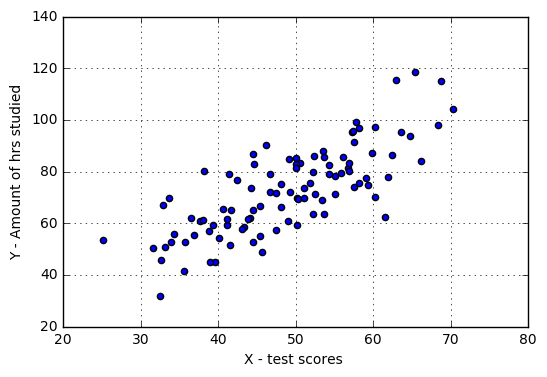

In [281]:
from numpy import *
import matplotlib.pyplot as plt
data_points = genfromtxt("data.csv", delimiter=",")
x=data_points[0:,:1]
y=data_points[0:,1:]
#refer for slicing http://www.scipy-lectures.org/intro/numpy/array_object.html
plt.ylabel('Y - Amount of hrs studied')
plt.xlabel('X - test scores ')
plt.scatter(x, y)
plt.grid(1)
plt.show()


mean = avarage
standard deviation/std/sigma   = sqrt(mean(abs(x - x.mean())**2)) or math.sqrt(variance)

mean = np.mean(arr)
variance = np.var(arr)
sigma = np.sqrt(variance)
 

In [277]:
x_mean=x.mean()
y_mean=y.mean()
standard_deviation_x=np.std(x)
standard_deviation_y=np.std(y)
x_mean,y_mean,standard_deviation_x,standard_deviation_y

(48.95834146155935, 72.735050553686463, 9.6975249632788181, 16.574687189684404)

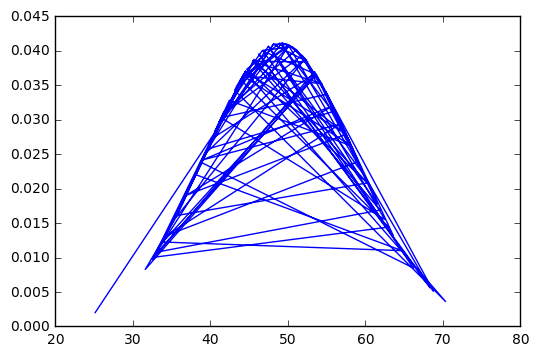

In [282]:

import matplotlib.mlab as mlab
plt.plot(x,mlab.normpdf(x, x_mean, standard_deviation_x))
plt.show()

Here p.d.f. - density or y axis

http://www.math.illinois.edu/~ajh/370/408normal.pdf

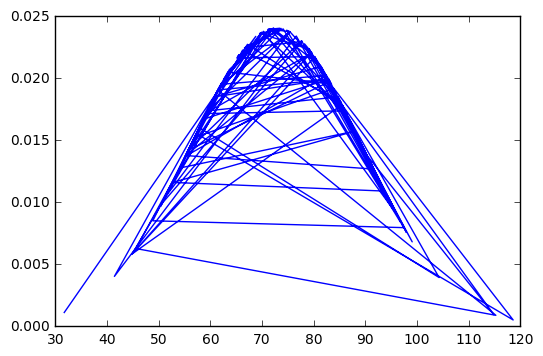

In [283]:
plt.plot(y,mlab.normpdf(y, y_mean, standard_deviation_y))
plt.show()

# PART 2: Usage gradient descent for linear regression 

In [262]:
   #Intialise variable
learning_rate = 0.00001  #  hyperparameter - lower the rate more accurate result it is. trade off with performance and    
initial_b = 0 # initial y-intercept guess 
initial_m = 0 # initial slope guess
num_iterations = 1000

inorder to find the ideal fitting - the changable values are m,b  - so if can righly fit 
these to value to the equation we are done. So the way basically our intention is to optimize
the value two values using gradient desent. Other words reducing error/cost

A standard approach to solving this type of problem is to define an error function 
(also called a cost function) that measures how “good” a given line is. This function will take in a (m,b) pair 
and return an error value based on how well the line fits our data. To compute this error 
for a given line, we’ll iterate through each (x,y) point in our data set and 
sum the square distances between each point’s y value and the candidate line’s y value (computed at mx + b). 
It’s conventional to square this distance to ensure that it is positive and to make our error function differentiable.
In python, computing the error for a given line will look like:

In [272]:

from IPython.display import Image
img1 = Image(filename='linear_regression_error1.png')
img2 = Image(filename='linear_regression_gradient1.png')

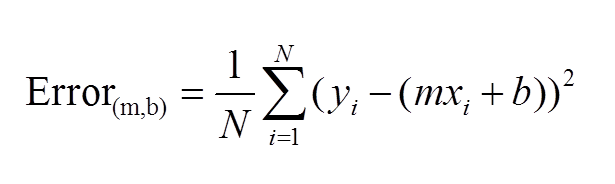

In [273]:
img1

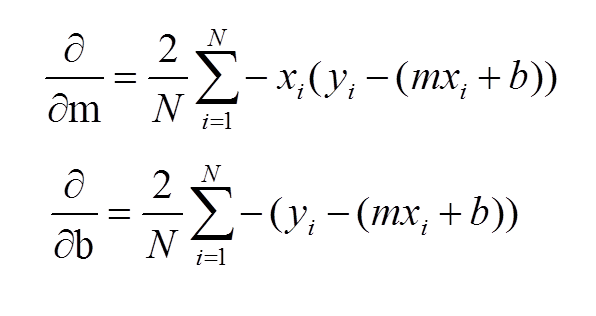

In [274]:
img2

In [275]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2 
        cost = totalError/float(len(points)) # this based on the formula of variance (sigma**2 ) 
    return cost

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current)) # using partial derivative based on b refer quation below
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))  # using partial derivative based on m refer quation above
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    J = [] # cost list of iteration
    #J = zeros(shape=(len(points),2)) 

    #efficent way of using numpy array http://stackoverflow.com/questions/568962/how-do-i-create-an-empty-array-matrix-in-numpy
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        J.append(compute_error_for_line_given_points(b, m, points))  
    return b, m, J

In [222]:
print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, data_points)))



Starting gradient descent at b = 0, m = 0, error = 5565.107834483211


In [263]:
b, m, J = gradient_descent_runner(data_points, initial_b, initial_m, learning_rate, num_iterations)

Cost evaluation - as seen below over the iteration cost gradually reduces

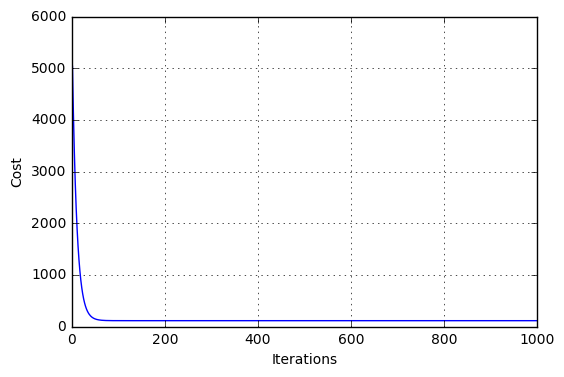

In [264]:
plt.plot(arange(1,num_iterations+1),J)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [265]:
m,b

(1.4788027179317091, 0.035074950196531202)

These form idea m and b. Thus we are able optimize value for m and b using gradient decent 

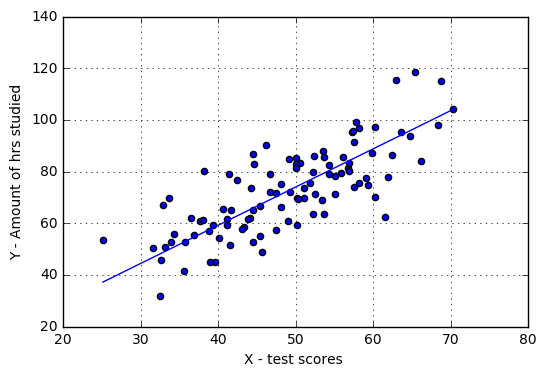

In [261]:
plt.ylabel('Y - Amount of hrs studied')
plt.xlabel('X - test scores ')
plt.scatter(x, y)
varX= linspace(min(x), max(x), x.size)
plt.plot(varX, m*varX + b)
plt.grid(1)
plt.show()